(0.0, 2.5)

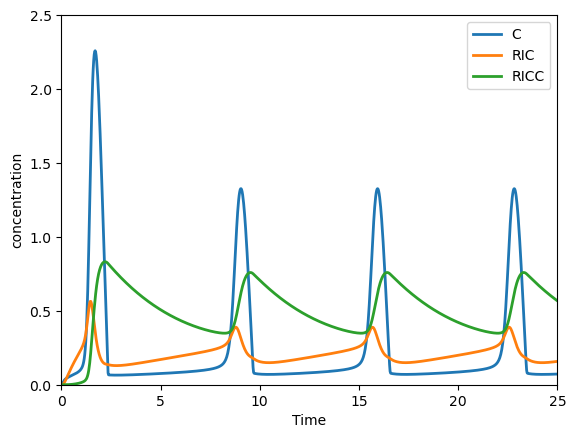

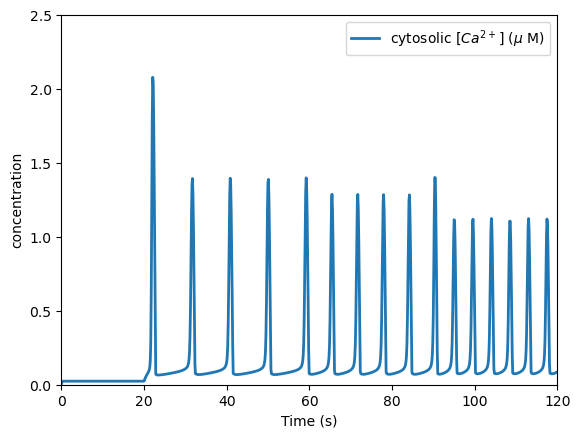

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#assign parameter values

gamma0=0.1
gamma1=20.5
p1=8.5
p2=0.065
k1=12
k2=15
k3=1.8
km1=8
km2=1.65
km3=0.21
Cs=8.37
vr=0.185
I=1




#set time_grid for simulation
times=np.linspace(0, 25, 1000) #generate time-grid list


#set initial conditions  State vector is S = [ C R RI RIC RICC]
Sinit=[0,1,0,0,0];
#declare right-hand-side for original model
def dSdt_original(S,t):
    dS=np.zeros(5) #generate a list to store derivatives
    
    C=S[0]
    R=S[1]
    RI=S[2]
    RIC=S[3]
    RICC=S[4]
    
    Ilocal=I
    
    #if mode=2, set the input parameter according to a time-varying profile:

    if mode==2:
        Ilocal=0
        if t>20:
            Ilocal=0.7
        if t>60:
            Ilocal=1.2
        if t>90:
            Ilocal=4

    
    dS[0]=vr*(gamma0+gamma1*RIC)*(Cs-C) - (p1*C**4)/(p2**4+C**4)
    dS[1]=-k1*Ilocal*R+km1*RI
    dS[2]=-(km1+k2*C)*RI+ k1*Ilocal*R + km2*RIC
    dS[3]=-(km2+k3*C)*RIC + k2*C*RI + km3*RICC
    dS[4]=k3*C*RIC - km3*RICC
    
    return dS


#plot simulation: Figure6.18A

mode=1
S=odeint(dSdt_original, Sinit, times) #run simulation

plt.figure() #generate figure
plt.plot(times, S[:,0], label="C", linewidth=2)
plt.plot(times, S[:,3], label="RIC", linewidth=2)
plt.plot(times, S[:,4], label="RICC", linewidth=2)
plt.xlabel("Time")
plt.ylabel("concentration")
plt.legend()
plt.xlim(0,25)
plt.ylim(0,2.5)


#plot simulation: Figure6.18B
# mode 2: varying input
mode=2

#set initial condition
Sinit=[0, 1 ,0 ,0 ,0];
times=np.linspace(0,120,1000)

#run simulation
S=odeint(dSdt_original, Sinit, times) #run simulation

#generate Figure 6.18B
plt.figure() #generate figure
plt.plot(times, S[:,0], label="cytosolic [$Ca^{2+}$] ($\mu$ M)", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("concentration")
plt.legend()
plt.xlim(0,120)
plt.ylim(0,2.5)


(a)

In [2]:
#assign parameter values

gamma0=0.1
gamma1=20.5
p1=8.5
p2=0.065
k1=12
k2=15
k3=1.8
km1=8
km2=1.65
km3=0.21
Cs=8.37
vr=0.185
# I=1


In [3]:
#set time_grid for simulation
times=np.linspace(0, 25, 1000) #generate time-grid list


#set initial conditions  State vector is S = [ C R RI RIC RICC]
Sinit=[0,1,0,0,0];

In [4]:
def dSdt_original(S,t, Ilocal):
    dS=np.zeros(5) #generate a list to store derivatives
    
    C=S[0]
    R=S[1]
    RI=S[2]
    RIC=S[3]
    RICC=S[4]

    
    dS[0]=vr*(gamma0+gamma1*RIC)*(Cs-C) - (p1*C**4)/(p2**4+C**4)
    dS[1]=-k1*Ilocal*R+km1*RI
    dS[2]=-(km1+k2*C)*RI+ k1*Ilocal*R + km2*RIC
    dS[3]=-(km2+k3*C)*RIC + k2*C*RI + km3*RICC
    dS[4]=k3*C*RIC - km3*RICC
    
    return dS

In [5]:
S=odeint(dSdt_original, Sinit, times, args=(10000.0,)) #run simulation

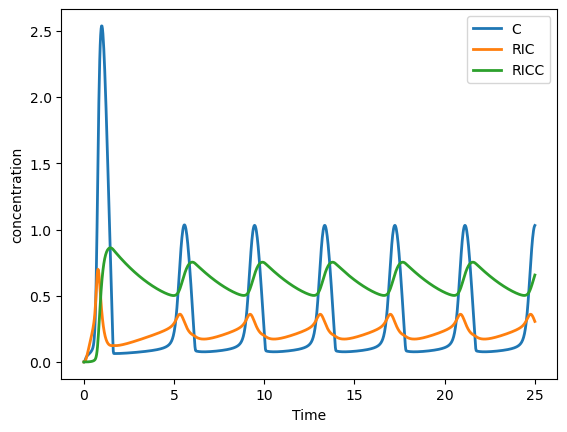

In [6]:
plt.figure() #generate figure
plt.plot(times, S[:,0], label="C", linewidth=2)
plt.plot(times, S[:,3], label="RIC", linewidth=2)
plt.plot(times, S[:,4], label="RICC", linewidth=2)
plt.xlabel("Time")
plt.ylabel("concentration")
plt.legend()
# plt.xlim(0,25)
# plt.ylim(0,2.5)


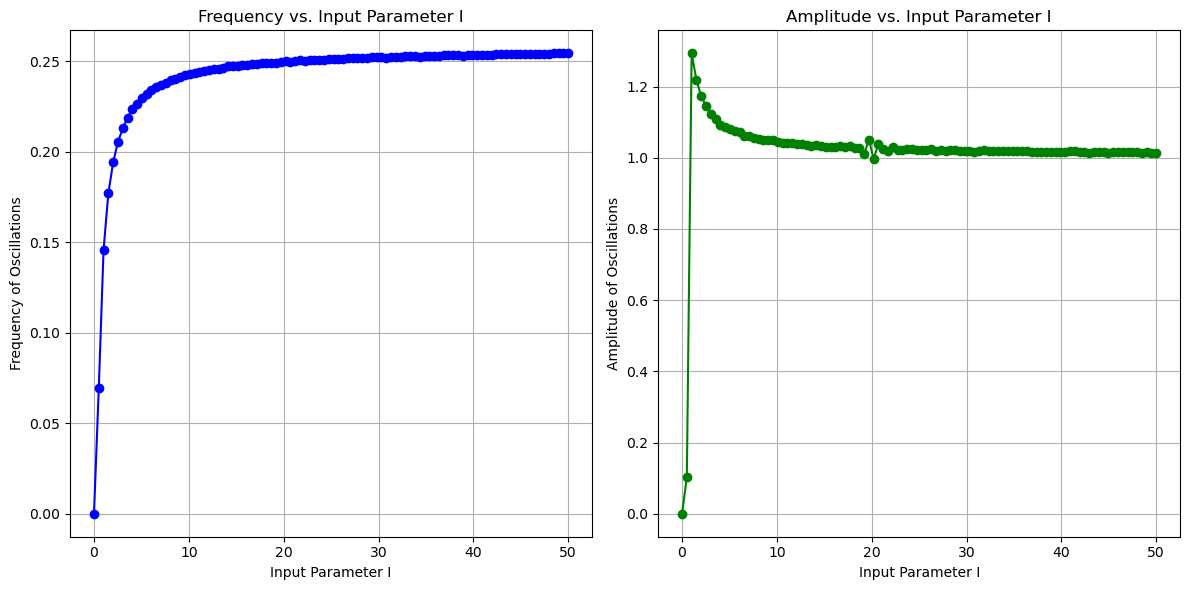

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assign parameter values
gamma0 = 0.1
gamma1 = 20.5
p1 = 8.5
p2 = 0.065
k1 = 12
k2 = 15
k3 = 1.8
km1 = 8
km2 = 1.65
km3 = 0.21
Cs = 8.37
vr = 0.185

# Define the time grid for simulation
times = np.linspace(0, 250, 1000)

# Define the system of ODEs
def dSdt(S, t, Ilocal):
    dS = np.zeros(5)
    C, R, RI, RIC, RICC = S
    
    dS[0] = vr * (gamma0 + gamma1 * RIC) * (Cs - C) - (p1 * C**4) / (p2**4 + C**4)
    dS[1] = -k1 * Ilocal * R + km1 * RI
    dS[2] = -(km1 + k2 * C) * RI + k1 * Ilocal * R + km2 * RIC
    dS[3] = -(km2 + k3 * C) * RIC + k2 * C * RI + km3 * RICC
    dS[4] = k3 * C * RIC - km3 * RICC
    
    return dS

# Initial conditions: State vector S = [C, R, RI, RIC, RICC]
Sinit = [0, 1, 0, 0, 0]

# Define a function to run simulations and calculate frequency and amplitude
def analyze_oscillations(I_values):
    frequencies = []
    amplitudes = []
    
    for I in I_values:
        # Run the simulation
        S = odeint(dSdt, Sinit, times, args=(I,))
        
        # Extract the calcium concentration (C)
        # C_values = S[:, 0]
        C_values = S[500:, 0]

        # Find peaks to measure oscillation frequency and amplitude
        peaks, _ = find_peaks(C_values, height=0.1)  # Adjust height threshold if needed
        
        # peak_times = times[peaks]
        # peak_values = C_values[peaks]
        peak_times = times[peaks+500]
        peak_values = C_values[peaks]

        # Calculate frequency (peaks per unit time)
        if len(peak_times) > 1:
            frequency = 1 / np.mean(np.diff(peak_times))
        else:
            frequency = 0  # No oscillations detected

        # Calculate amplitude (mean peak height)
        amplitude = np.mean(peak_values) if len(peak_values) > 0 else 0

        frequencies.append(frequency)
        amplitudes.append(amplitude)
    
    return frequencies, amplitudes

# Define the range of I values to explore
I_values = np.linspace(0, 50, 100)

# Analyze the oscillations for different I values
frequencies, amplitudes = analyze_oscillations(I_values)

# Plot the results
plt.figure(figsize=(12, 6))

# Frequency plot
plt.subplot(1, 2, 1)
plt.plot(I_values, frequencies, 'o-', color='blue')
plt.xlabel('Input Parameter I')
plt.ylabel('Frequency of Oscillations')
plt.title('Frequency vs. Input Parameter I')
plt.grid(True)

# Amplitude plot
plt.subplot(1, 2, 2)
plt.plot(I_values, amplitudes, 'o-', color='green')
plt.xlabel('Input Parameter I')
plt.ylabel('Amplitude of Oscillations')
plt.title('Amplitude vs. Input Parameter I')
plt.grid(True)

plt.tight_layout()
plt.show()


checking the above work!

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assign parameter values
gamma0 = 0.1
gamma1 = 20.5
p1 = 8.5
p2 = 0.065
k1 = 12
k2 = 15
k3 = 1.8
km1 = 8
km2 = 1.65
km3 = 0.21
Cs = 8.37
vr = 0.185

# Define the time grid for simulation
times = np.linspace(0, 250, 1000)

# Define the system of ODEs
def dSdt(S, t, Ilocal):
    dS = np.zeros(5)
    C, R, RI, RIC, RICC = S
    
    dS[0] = vr * (gamma0 + gamma1 * RIC) * (Cs - C) - (p1 * C**4) / (p2**4 + C**4)
    dS[1] = -k1 * Ilocal * R + km1 * RI
    dS[2] = -(km1 + k2 * C) * RI + k1 * Ilocal * R + km2 * RIC
    dS[3] = -(km2 + k3 * C) * RIC + k2 * C * RI + km3 * RICC
    dS[4] = k3 * C * RIC - km3 * RICC
    
    return dS

# Initial conditions: State vector S = [C, R, RI, RIC, RICC]
Sinit = [0, 1, 0, 0, 0]

In [30]:
I=10

S = odeint(dSdt, Sinit, times, args=(I,))
        
# Extract the calcium concentration (C)

C_values = S[500:, 0]

# Find peaks to measure oscillation frequency and amplitude
peaks, _ = find_peaks(C_values, height=0.1)  # Adjust height threshold if needed
peak_times = times[peaks+500]
peak_values = C_values[peaks]

# Calculate frequency (peaks per unit time)
if len(peak_times) > 1:
    frequency = 1 / np.mean(np.diff(peak_times))
else:
    frequency = 0  # No oscillations detected

# Calculate amplitude (mean peak height)
amplitude = np.mean(peak_values) if len(peak_values) > 0 else 0

In [31]:
peak_times

array([51.15115115, 55.25525526, 59.35935936, 63.56356356, 67.66766767,
       71.77177177, 75.87587588, 79.97997998, 84.08408408, 88.28828829,
       92.39239239, 96.4964965 ])

In [32]:
times[:-500].shape

(500,)

Frequency: 0.2425827814569536
Amplitude: 1.066675634903935


(225.0, 250.0)

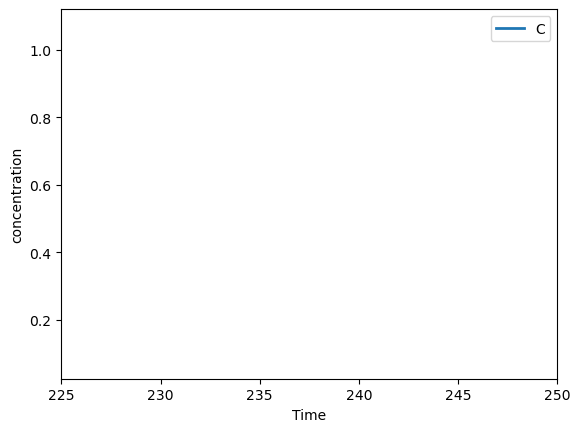

In [33]:
print('Frequency:', frequency)
print('Amplitude:', amplitude)
plt.figure()
plt.plot(times[500:], C_values, label="C", linewidth=2)
plt.xlabel("Time")
plt.ylabel("concentration")
plt.legend()
plt.xlim(225,250) 

# plt.plot(times, S[:,0], label="C", linewidth=2)


(b).

In [24]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
gamma0 = 0.1
gamma1 = 20.5
p1 = 8.5
p2 = 0.065
k1 = 12
k2 = 15
k3 = 1.8
km1 = 8
km2 = 1.65
km3 = 0.21
Cs = 8.37
vr = 0.185

k4 = 0.1
k5 = 0.1
k6 = 0.1
k7 = 0.1
km4 = 0.1
km5 = 0.1

# # New parameters for CaM-kinase dynamics
# alpha = 0.5  # Activation rate constant
# beta = 0.1   # Deactivation rate constant

# Time grid for simulation
times = np.linspace(0, 100, 1000)

# Define the modified system of ODEs with CaM-kinase activity
def dSdt_extended(S, t, Ilocal):
    dS = np.zeros(9)
    C, R, RI, RIC, RICC, Cal, Cal_p, CaMK, CaMK_p = S
    
    # Calcium dynamics
    dS[0] = vr * (gamma0 + gamma1 * RIC) * (Cs - C) - (p1 * C**4) / (p2**4 + C**4) - k4*Cal*C**4 + 4*km4*Cal_p
    
    # Receptor states
    dS[1] = -k1 * Ilocal * R + km1 * RI
    dS[2] = -(km1 + k2 * C) * RI + k1 * Ilocal * R + km2 * RIC
    dS[3] = -(km2 + k3 * C) * RIC + k2 * C * RI + km3 * RICC
    dS[4] = k3 * C * RIC - km3 * RICC

    # CaM-kinase activity dynamics
    dS[5] = -k4*Cal*C**4 + km4*Cal_p
    dS[6] = k4*Cal*C**4 -km4*Cal_p
    dS[7] = - k6*k5*Cal_p / (km5 + k6 + k5*CaMK) + k7*CaMK_p
    dS[8] = k6*k5*Cal_p / (km5 + k6 + k5*CaMK) - k7*CaMK_p
    
    return dS



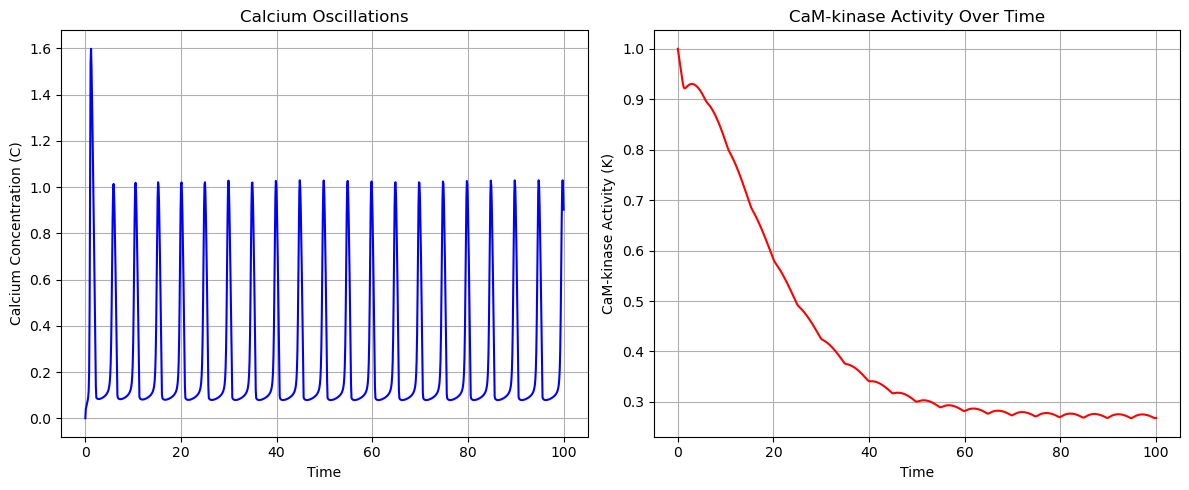

In [66]:
# Initial conditions: S = [C, R, RI, RIC, RICC, Cal, Cal_p, CaMK, CaMK_p]
Sinit_extended = [0, 1, 0, 0, 0, 10, 1, 1, 1]

# Simulate the system for a given I value
I_value = 1.50
S_extended = odeint(dSdt_extended, Sinit_extended, times, args=(I_value,))

# Extract variables from the solution
C_values = S_extended[:, 0]
CaMK_p_values = S_extended[:, -1]

# Plot calcium concentration and CaM-kinase activity over time
plt.figure(figsize=(12, 5))

# Calcium concentration plot
plt.subplot(1, 2, 1)
plt.plot(times, C_values, color='blue')
plt.xlabel('Time')
plt.ylabel('Calcium Concentration (C)')
plt.title('Calcium Oscillations')
plt.grid(True)

# CaM-kinase activity plot
plt.subplot(1, 2, 2)
plt.plot(times, CaMK_p_values, color='red')
plt.xlabel('Time')
plt.ylabel('CaM-kinase Activity (K)')
plt.title('CaM-kinase Activity Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
Sinit_extended = [0, 1, 0, 0, 0, 10, 1, 1, 1]

In [77]:
def analyze_Cfreq_avg_CaMK_p(I_values):
    frequencies = []
    avg_CaMK_p = []
    
    # print(I_values)
    for I in I_values:
        # Run the simulation
        S_extended = odeint(dSdt_extended, Sinit_extended, times, args=(I,))
        
        # Extract the calcium concentration (C)
        C_values = S_extended[:, 0]

        # Find peaks to measure oscillation frequency and amplitude
        peaks, _ = find_peaks(C_values, height=0.1)  # Adjust height threshold if needed
        peak_times = times[peaks]

        if len(peak_times) > 1:
            frequency = 1 / np.mean(np.diff(peak_times))
        else:
            frequency = 0  # No oscillations detected

        # Calculate average CaMK_p concentration
        avg_CaMK_p_value = np.mean(S_extended[:, 8])

        # print('Frequency:', frequency)
        # print('Average CaMK_p:', avg_CaMK_p_value)
        frequencies.append(frequency)
        avg_CaMK_p.append(avg_CaMK_p_value)
    
    return frequencies, avg_CaMK_p

In [83]:
# Define the range of I values to explore
I_values_b = np.linspace(0, 1.5, 10)
# I_values_b = np.array([0.5,1.5])

# Analyze the oscillations for different I values
frequencies_b, avg_CaMK_p = analyze_Cfreq_avg_CaMK_p(I_values_b)

In [84]:
frequencies_b, avg_CaMK_p

([0,
  0,
  0,
  0.0645905172413793,
  0.12320657759506681,
  0.1512,
  0.16968152866242037,
  0.18348979591836734,
  0.19407975460122698,
  0.20284263959390864],
 [0.1297585979790894,
  0.12977881236171496,
  0.1298265995540541,
  0.28008631908215564,
  0.37785652305028666,
  0.4036629987143395,
  0.4141169526051191,
  0.41855359979674256,
  0.4203311182815361,
  0.42075865403637247])

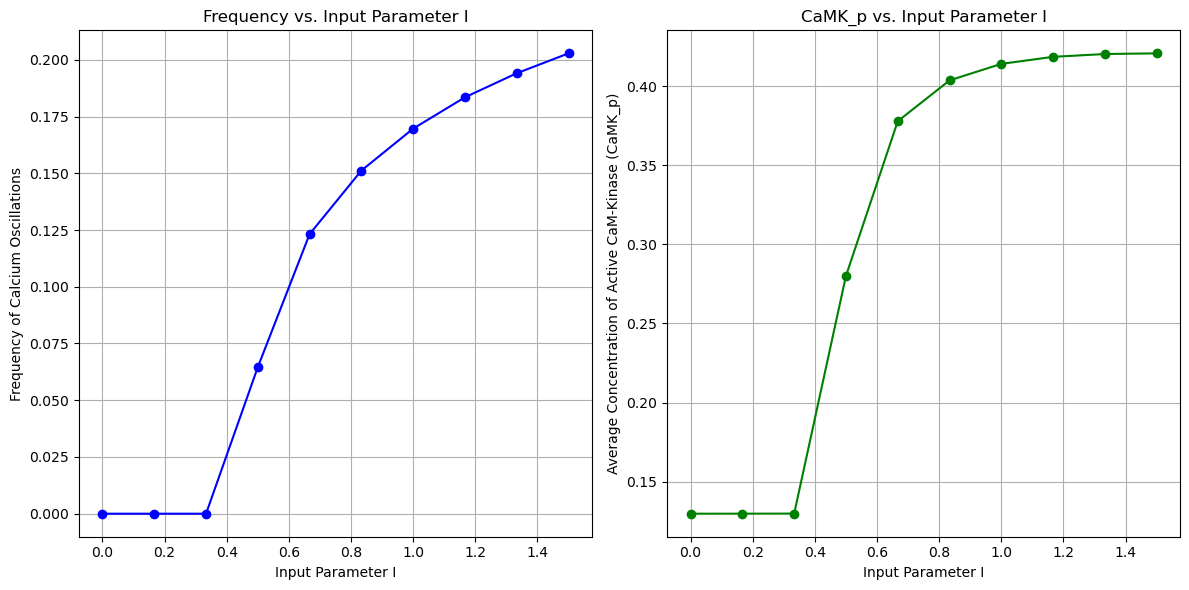

In [91]:
# Plot the results
plt.figure(figsize=(12, 6))

# Frequency plot
plt.subplot(1, 2, 1)
plt.plot(I_values_b, frequencies_b, 'o-', color='blue')
plt.xlabel('Input Parameter I')
plt.ylabel('Frequency of Calcium Oscillations')
plt.title('Frequency vs. Input Parameter I')
plt.grid(True)

# Amplitude plot
plt.subplot(1, 2, 2)
plt.plot(I_values_b, avg_CaMK_p, 'o-', color='green')
plt.xlabel('Input Parameter I')
plt.ylabel('Average Concentration of Active CaM-Kinase (CaMK_p)')
plt.title('CaMK_p vs. Input Parameter I')
plt.grid(True)

plt.tight_layout()
plt.show()


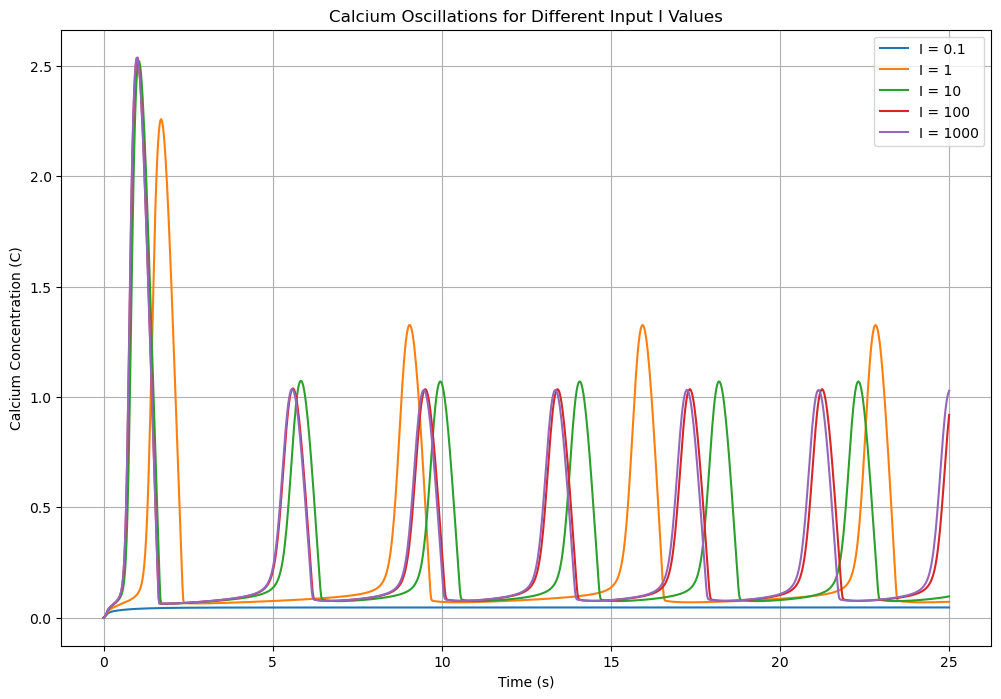

I = 0.1: Frequency = 0.00 Hz, Amplitude = 0.00
I = 1: Frequency = 0.14 Hz, Amplitude = 2.26
I = 10: Frequency = 0.24 Hz, Amplitude = 2.52
I = 100: Frequency = 0.25 Hz, Amplitude = 2.54
I = 1000: Frequency = 0.25 Hz, Amplitude = 2.54


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
gamma0 = 0.1
gamma1 = 20.5
p1 = 8.5
p2 = 0.065
k1 = 12
k2 = 15
k3 = 1.8
km1 = 8
km2 = 1.65
km3 = 0.21
Cs = 8.37
vr = 0.185

# Simulation time
times = np.linspace(0, 25, 1000)

# Define the differential equations
def dSdt(S, t, Ilocal):
    C, R, RI, RIC, RICC = S
    
    dC_dt = vr * (gamma0 + gamma1 * RIC) * (Cs - C) - (p1 * C**4) / (p2**4 + C**4)
    dR_dt = -k1 * Ilocal * R + km1 * RI
    dRI_dt = -(km1 + k2 * C) * RI + k1 * Ilocal * R + km2 * RIC
    dRIC_dt = -(km2 + k3 * C) * RIC + k2 * C * RI + km3 * RICC
    dRICC_dt = k3 * C * RIC - km3 * RICC

    return [dC_dt, dR_dt, dRI_dt, dRIC_dt, dRICC_dt]

# Extend the model to include CaM-kinase dynamics
def dSdt_with_CaMK(S, t, Ilocal):
    C, R, RI, RIC, RICC, CaMK = S

    # Calcium dynamics (same as before)
    dC_dt = vr * (gamma0 + gamma1 * RIC) * (Cs - C) - (p1 * C**4) / (p2**4 + C**4)
    dR_dt = -k1 * Ilocal * R + km1 * RI
    dRI_dt = -(km1 + k2 * C) * RI + k1 * Ilocal * R + km2 * RIC
    dRIC_dt = -(km2 + k3 * C) * RIC + k2 * C * RI + km3 * RICC
    dRICC_dt = k3 * C * RIC - km3 * RICC

    # CaM-kinase dynamics
    CaMK_activation_rate = 10.0 * (C**2) / (1 + C**2)
    CaMK_deactivation_rate = 0.1 * CaMK
    dCaMK_dt = CaMK_activation_rate - CaMK_deactivation_rate

    return [dC_dt, dR_dt, dRI_dt, dRIC_dt, dRICC_dt, dCaMK_dt]

# Initial conditions
Sinit = [0, 1, 0, 0, 0, 0]  # Add 0 for CaMK if using the extended model

# Run simulations for different I values
I_values = [0.1, 1, 10, 100, 1000]  # Example input values
results = {}

for I in I_values:
    S = odeint(dSdt_with_CaMK, Sinit, times, args=(I,))
    results[I] = S

# Plot results
plt.figure(figsize=(12, 8))

# Plot calcium concentration over time for different I values
for I, S in results.items():
    plt.plot(times, S[:, 0], label=f'I = {I}')

plt.xlabel('Time (s)')
plt.ylabel('Calcium Concentration (C)')
plt.title('Calcium Oscillations for Different Input I Values')
plt.legend()
plt.grid(True)
plt.show()

# Analyze frequency and amplitude
def analyze_oscillations(time, calcium_data):
    from scipy.signal import find_peaks
    
    peaks, _ = find_peaks(calcium_data)
    peak_times = time[peaks]

    if len(peak_times) > 1:
        periods = np.diff(peak_times)
        frequency = 1 / np.mean(periods)
        amplitude = np.max(calcium_data) - np.min(calcium_data)
        return frequency, amplitude
    else:
        return 0, 0  # No oscillations detected

# Analyze and print frequency and amplitude for each I value
for I, S in results.items():
    frequency, amplitude = analyze_oscillations(times, S[:, 0])
    print(f'I = {I}: Frequency = {frequency:.2f} Hz, Amplitude = {amplitude:.2f}')
